# Keras 기반의 표준화: TensorFlow 2.0의 고수준 API


Keras는 머신러닝 모델을 정의하고 훈련하기 위한 API 표준이다.



Keras는 딥 러닝 모델의 빌드와 훈련을 위한 고수준 API로, 매우 큰 인기를 끌고 있다. Keras는 빠른 프로토타입 개발, 최첨단 분야 연구, 생산 분야에 사용된다. TensorFlow는 현재 Keras를 지원하지만, 2.0 버전에서는 Keras를 TensorFlow 플랫폼의 나머지 부분과 더욱 밀접하게 통합하게 되었다.
Keras를 TensorFlow용 고수준 API로 확립함으로써, 머신러닝을 처음 시도하는 개발자가 TensorFlow로 더 쉽게 시작할 수 있도록 해준다. 고수준 API가 하나로 통합되면 혼란이 줄고 연구자를 위한 고급 기능을 제공하는 데 집중할 수 있다.


### Keras의 장점
* 사용자 친화적: 일반적인 사용 사례에 맞춰 최적화된 Keras의 인터페이스는 간단하고 일관성이 있다. 
* 모듈식, 구성 가능: 기본 구성 요소를 함께 연결하는 방식으로 모형을 생성할 수 있다. 
* 손쉬운 확장: 새로운 계층, 손실 함수 등을 비롯하여, 연구를 위한 새로운 아이디어를 표현하는 맞춤 기본 구성 요소를 작성할 수 있다.
* 초보자와 전문가에게 모두 유용: Keras는 초보 개발자든 오랜 경험을 보유한 전문가든 상관없이 모두에게 유용한 API를 제공한다.

### Keras API 개요

* Sequential API
* Functional API
* Model Subclassing API

필요한 라이브러리를 임포트하고 실습에 필요한 샘플 데이터셋을 생성한다.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

print(' TensorFlow version:', tf.__version__)
print(' tf.keras version:', tf.keras.__version__)

 TensorFlow version: 2.3.0
 tf.keras version: 2.4.0


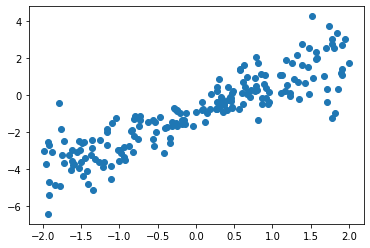

In [2]:
## 랜덤한 회귀용 예제 데이터셋을 만듭니다

np.random.seed(0)

def make_random_data():
    x = np.random.uniform(low=-2, high=2, size=200)
    y = []
    for t in x:
        r = np.random.normal(loc=0.0, 
                             scale=(0.5 + t*t/3), 
                             size=None)
        y.append(r)
    return  x, 1.726*x -0.84 + np.array(y)


x, y = make_random_data() 

plt.plot(x, y, 'o')
plt.show()

In [3]:
# 훈련데이터 / 테스트 데이터 나누기
x_train, y_train = x[:150], y[:150]
x_test, y_test = x[150:], y[150:]

## Sequential API

초보의 경우 tf.keras Sequential API로 시작할 것을 권장한다. 사실상 ML 문제의 95% 정도에 적합한 API이기 때문이다. 매우 간단하고 짧은 코드로 모형을 생성할 수 있다.

### tf.keras Sequential 모델

Sequential 모델은 순서대로 층을 쌓아 모형을 생성한다. 

* Dense 층은 완전 연결층이다. 

* 이 예제에서는 간단한 y = wx + b 형태의 회귀 모형을 구현한다. 1차원 데이터 셋으로 출력 유닛 하나를 가진 간단한 완전 연결층 하나를 추가한다.

* 회귀모형이므로 마지막 출력층의 활성화 함수를 설정하지 않는다. 

* activation 파라미터의 기본은 None이다. sigmoid, tanh, relu를 지정 가능하다.


참고) https://www.tensorflow.org/guide/keras#build_a_simple_model 


In [4]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(units=1, input_dim=1))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


## Functional API

다중 입력 및 다중 출력 모델, 공유 계층이 있는 모델 등을 비롯한 사용자가 직접  정의할 수 있게 해주는 Functional API를 사용하여 더욱 복잡한 모델을 빌드할 수 있다.


Functional API로 모델을 빌드할 때 계층은 (텐서에서) 호출 가능하고 텐서를 출력으로 반환한다. 그러면 이러한 입력 텐서와 출력 텐서를 사용하여 모델을 정의할 수 있다.


### 함수형 API
sequential 모델은 층을 순서대로 쌓은 것이다. 보다 복잡한 모형을 만들어야 할 때 tf.keras의 함수형 API를 사용하면 더 다양한 모델을 만들 수 있다. 함수형API를 사용하면 원하는 층을 자유롭게 조합 할 수 있다. 


참고) https://www.tensorflow.org/guide/keras#functional_api 


In [39]:
from tensorflow.keras import Model, Input

input = tf.keras.Input(shape=(1,))
output = tf.keras.layers.Dense(1)(input)

model = tf.keras.Model(input, output)

model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Input layer는 입력데이터를 위한 층으로 훈련할 가중치를 가지고 있지 않다. 

컴파일하고 훈련하는 단계는 sequential 모델과 동일하다.

## Model Subclassing API

Model Subclassing API를 사용하여 완전 맞춤형 모형을 생성할 수 있다. 클래스 메서드 본문에 자체적인 포워드 패스를 직접 명령형으로 정의한다.


이러한 모델은 더 유연하게 모형을 생성 할 수 있지만 디버그하기는 더 어려울 수 있다. 

참고) https://www.tensorflow.org/guide/keras#model_subclassing

In [79]:
class MyModel(tf.keras.Model):
    def __init__(self, units=1):
        super(MyModel, self).__init__()
        # 모형의 layer를 선언
        self.dense_1 = tf.keras.layers.Dense(units=units)
    def call(self, inputs):
        output = self.dense_1(inputs)
        return output


In [80]:
# Model Subclassing은 앞선 다른 모형(Sequential, functional) 방법과는 다르다.
# subclassed model은 call 메소드를 통해 모형이 정의된다.
# 입출력의 shape이 첫 테스트 될 때까지 정해지지 않는다. 
model = MyModel()
 
model.build((x_train.size, y_train.size))
model.summary()

Model: "my_model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             multiple                  151       
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


## 모형의 훈련

세 가지 유형의 모형은 모두 간단한 compile 및 fit 명령어를 사용하여 컴파일 및 훈련 가능하다. 

**compile()메서드** 


* `loss = 'mse'` 에서 회귀문제를 위해 평균제곱오차를 손실함수로 설정한다.
* 다중 클래스 분류 문제를 위해서는 `categorical_crossentropy`, 이진 분류에서는 `binary_crossentropy`를 사용한다.
* `optimizer='sgd'` 경사하강법 옵티마이저를 정한다. SGD 이외에도 여러가지가 있다.

참고) https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile

In [63]:
model.compile(optimizer='sgd', loss='mse')

**fit()메서드**

* `validation_split=0.3` : 검증데이터 크기를  30%로 한다.
* `history` : 히스토리 객체는 epoch마다 계산한 손실 함수 값이 저장되어 있다. 
* 훈련세트에 대한 손실 함수값은 `'loss'` 키에 담겨 있다.

참고) https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit

In [64]:
history = model.fit(x_train, y_train, epochs=100, 
                    validation_split=0.3)

Epoch 1/100
4/4 [==============================] - 0s 23ms/step - loss: 10.5266 - val_loss: 6.4301
Epoch 2/100
4/4 [==============================] - 0s 5ms/step - loss: 8.7541 - val_loss: 5.3923
Epoch 3/100
4/4 [==============================] - 0s 5ms/step - loss: 7.1656 - val_loss: 4.3525
Epoch 4/100
4/4 [==============================] - 0s 5ms/step - loss: 5.6704 - val_loss: 3.6915
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 4.7023 - val_loss: 3.2101
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 3.9927 - val_loss: 2.8090
Epoch 7/100
4/4 [==============================] - 0s 5ms/step - loss: 3.3907 - val_loss: 2.4572
Epoch 8/100
4/4 [==============================] - 0s 5ms/step - loss: 2.8900 - val_loss: 2.1500
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 2.4575 - val_loss: 1.9371
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 2.1576 - val_loss: 1.7492
Epoch 11/100
4/4 [=========

4/4 [==============================] - 0s 5ms/step - loss: 0.7574 - val_loss: 0.8984
Epoch 83/100
4/4 [==============================] - 0s 5ms/step - loss: 0.7569 - val_loss: 0.8988
Epoch 84/100
4/4 [==============================] - 0s 5ms/step - loss: 0.7564 - val_loss: 0.8973
Epoch 85/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7567 - val_loss: 0.8993
Epoch 86/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7571 - val_loss: 0.9029
Epoch 87/100
4/4 [==============================] - 0s 5ms/step - loss: 0.7574 - val_loss: 0.9051
Epoch 88/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7575 - val_loss: 0.9125
Epoch 89/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7580 - val_loss: 0.9082
Epoch 90/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7566 - val_loss: 0.9049
Epoch 91/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7566 - val_loss: 0.9023
Epoch 92/100
4/4 [===============

### 훈련 결과 확인

fit 메소드를 수행한 결과로 history 객체에는 각 epoch 마다 계산된 손실 함수 값이 저장되어 있다. 이를 시각화하여 훈련 결과를 확인할 수 있다.

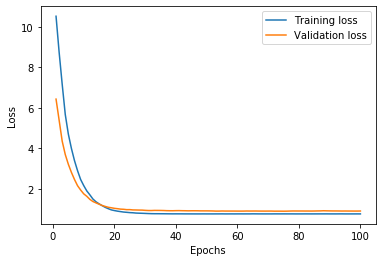

In [65]:
epochs = np.arange(1, 100+1)
plt.plot(epochs, history.history['loss'], label='Training loss')
plt.plot(epochs, history.history['val_loss'], label='Validation loss') # validation loss
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### tf.keras 모델의 저장과 복원

In [11]:
model.save_weights('simple_weights.h5')

In [12]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_dim=1))
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.SGD(lr=0.01))

model.load_weights('simple_weights.h5')

In [13]:
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 501us/step - loss: 0.9434


0.9434214234352112

In [14]:
model.save('simple_model.h5')

In [15]:
model = tf.keras.models.load_model('simple_model.h5')
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 0s/step - loss: 0.9434


0.9434214234352112

### 회귀 직선식을 시각화하여 출력한다.

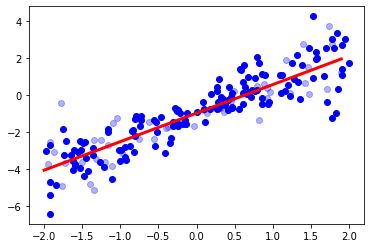

In [60]:
# 짙은 색은 훈련데이터, 밝은 색은 테스트 데이터
x_arr = np.arange(-2, 2, 0.1)
y_arr = model.predict(x_arr)

plt.figure()
plt.plot(x_train, y_train, 'bo')
plt.plot(x_test, y_test, 'bo', alpha=0.3)
plt.plot(x_arr, y_arr, '-r', lw=3)
plt.show()